Methods cant handle sparse graphs

In [1]:
from dag_gen.acyclic_graph_generator import AcyclicGraphGenerator
import json
import pandas as pd
import cdt
import networkx as nx
import warnings
# from causalnex.structure import StructureModel
# from causalnex.plots import plot_structure
# from causalnex.structure.notears import from_pandas, from_numpy
from IPython.display import Image
import numpy as np
import os
# warnings.filterwarnings("ignore")  # silence warnings

cdt.SETTINGS.rpath = 'C:\Program Files\R\R-4.2.1\\bin\Rscript' # path to your r executable
cdt.SETTINGS.rpath

Detecting 1 CUDA device(s).


'C:\\Program Files\\R\\R-4.2.1\\bin\\Rscript'

In [7]:
data_config = {
            "causal_mechanism": "mix",
            "noise": "gaussian",
            "noise_coeff": 0.4,
            "selection_bias_nodes": 1,
            "selection_bias_ratio": 0.5,
            "selection_bias_range": [0, 0.5],
            "confounders":2,
            "npoints": 500,
            "nodes": 3,
            "parents_max": 3,
            "expected_degree":2,
            "random_seed": 41
        }
generator = AcyclicGraphGenerator(**data_config)
generator.generate_to_folder(
                        data_path='', data_index=1)

self.data.columns
Index(['V0', 'V1', 'V2', 'V3', 'V4'], dtype='object')
i
0
self.g node
[0, 1, 2, 3, 4]
random_sample
4
self.adjacency_matrix.shape
(5, 5)
horizontal_vect
[1, 2]
random_sample
4
i
1
self.g node
[0, 1, 2, 3]
random_sample
3
self.adjacency_matrix.shape
(4, 4)
horizontal_vect
[1, 2]
random_sample
3
deleted_nodes
[4, 3]
self.data.columns
Index(['V0', 'V1', 'V2'], dtype='object')
sample_idx
[0, 1, 2]


In [20]:
G = nx.DiGraph()
G.add_node(0)
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_edge(0, 1)
G.add_edge(0, 2)
G.add_edge(2, 1)
G.add_edge(3, 1)

print(nx.to_numpy_matrix(G))

[[0. 1. 1. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


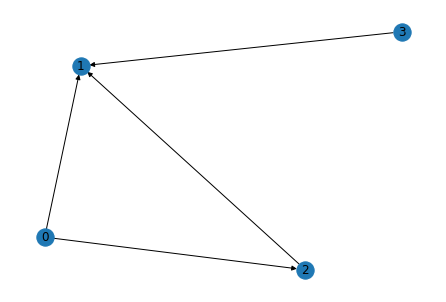

In [21]:
nx.draw(G,  with_labels = True)

In [25]:
for i in nx.topological_sort(G):
    print(i)
    print(nx.to_numpy_matrix(G)[:, i])
    print("====")
    print(nx.to_numpy_matrix(G)[:, i].nonzero()[0])

0
[[0.]
 [0.]
 [0.]
 [0.]]
====
[]
3
[[0.]
 [0.]
 [0.]
 [0.]]
====
[]
2
[[1.]
 [0.]
 [0.]
 [0.]]
====
[0]
1
[[1.]
 [0.]
 [1.]
 [1.]]
====
[0 2 3]


In [3]:
DATA_DIR = 'data/'

In [4]:
with open("data_config.json", 'r') as f:
  data_config = json.load(f)

In [5]:
# for dataset_group, datasets in data_config.items():
#     dataset_group_path = os.path.join(DATA_DIR, dataset_group)
#     if not os.path.isdir(DATA_DIR):
#         os.mkdir(DATA_DIR)
#     if not os.path.isdir(dataset_group_path):
#         os.mkdir(dataset_group_path)
#     for dataset_name, generator_config in datasets.items():
#         dataset_path = os.path.join(dataset_group_path, dataset_name)
#         # If directory doesn't exist or isn't empty
#         if not os.path.isdir(dataset_path):
#             os.mkdir(dataset_path)
#         if len(os.listdir(dataset_path)) == 0:
#             generator = AcyclicGraphGenerator(**generator_config)
#             generator.generate_to_folder(data_path=dataset_path, data_index=1)

In [38]:
adjacency = np.load(DATA_DIR+"mix_mechanism/medium_all/DAG1.npy")
data = np.load(DATA_DIR+"mix_mechanism/medium_all/data1.npy")

# conf_adjacency = np.load(DATA_DIR+"mix_mechanism\medium_all\confounder_DAG1.npy")
# conf_data = np.load(DATA_DIR+"mix_mechanism\medium_all\confounder_data1.npy")

In [39]:
data = data[0:100, 0:3]
adjacency = adjacency[0:3, 0:3]
np.save(DATA_DIR+"mix_mechanism/medium_all/data1.npy", data)
np.save(DATA_DIR+"mix_mechanism/medium_all/DAG1.npy", adjacency)

In [9]:
# graph = nx.from_numpy_array(adjacency, create_using=nx.DiGraph)
# e = list(graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

In [10]:
# conf_graph = nx.from_numpy_array(conf_adjacency, create_using=nx.DiGraph)
# e = list(conf_graph.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# CAM

In [11]:
from cdt.causality.graph import CAM
from pandas import DataFrame
obj = CAM()
output = obj.predict(DataFrame(data))

In [12]:
# e = list(output.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# SAM

In [20]:
import networkx as nx
from cdt.causality.graph import SAM
from cdt.data import load_dataset
from pandas import DataFrame
obj = SAM(train_epochs=100, test_epochs=25, nruns=1)
#The predict() method works without a graph, or with a
#directed or undirected graph provided as an input
output = obj.predict(DataFrame(data))    #No graph provided as an argument
# output = obj.predict(data, nx.Graph(graph))  #With an undirected graph
# output = obj.predict(data, graph)  #With a directed graph
#To view the graph created, run the below commands:
# e = list(output.edges())
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

100%|██████████| 125/125 [00:28<00:00,  4.36it/s, disc=-.051, gen=-.993, regul_loss=0.5, tot=-1.2]  


# NOTEAR

In [21]:
from test_algo.notears import notears

In [22]:
output_dict = notears.run(notears.notears_standard, data, notears.loss.least_squares_loss, notears.loss.least_squares_loss_grad, e=1e-8, verbose=False)

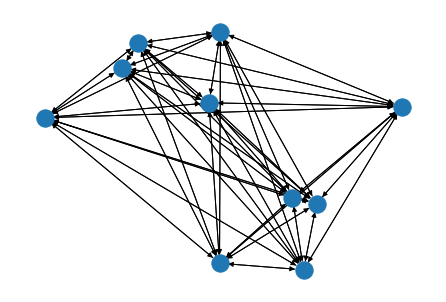

In [ ]:
# e = list(pred_graph.edges())
# nx.draw(pred_graph)
# causal_nex_graph = StructureModel(e)
# viz = plot_structure(causal_nex_graph)  # Default CausalNex visualisation
# image_binary = viz.draw(format="jpg")
# Image(image_binary, height=400) 

# gran dag

In [46]:
import os
os.chdir('./test_algo/gran_dag')

In [47]:
!python ./main.py --exp-path ./final_log/ --data-path ../../data/mix_mechanism/medium_all --i-dataset 1 --model NonLinGaussANM --train --to-dag --num-vars 3 --jac-thresh

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
Training from scratch
Train already computed. Loading result from disk.
Edges/thresh tensor(3.) 0.0
    threshold: 0.0
    edges: 3.0
Traceback (most recent call last):
  File "./main.py", line 134, in <module>
    main(parser.parse_args())
  File "/home/james/Work/dag_gen/examples/test_algo/gran_dag/gran_dag/main.py", line 123, in main
    to_dag(model, train_data, test_data, opt, metrics_callback, plotting_callback)
  File "/home/james/Work/dag_gen/examples/test_algo/gran_dag/gran_dag/train.py", line 405, in to_dag
    shd_cpdag = float(cdt.metrics.SHD_CPDAG(target=train_adj_, pred=pred_adj_))
  File "/home/james/Work/dag_gen/.venv/lib/python3.6/site-packages/cdt/metrics.py", line 185, in SHD_CPDAG
    true_labels = get_CPDAG(true_labels)
  File "/home/james/Work/dag_gen/.venv/lib/python3.6/site-packages/cdt/metrics.py", line 131, in get_CPDAG
    raise ImportError("pcalg R package is not avail

In [60]:
!python ./dag_gnn/main.py --exp-path ./final_log_1/ --data-path ../../data/mix_mechanism/medium_all --i-dataset 1 --data_variable_size 3

No GPU automatically detected. Setting SETTINGS.GPU to 0, and SETTINGS.NJOBS to cpu_count.
Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
0.0
Epoch: 0000 nll_train: 0.5123076211 kl_train: 0.0950198357 ELBO_loss: 0.6073274568 mse_train: 0.3415384140 shd_trian: 0.0000000000 time: 0.0554s
Mean of empty slice.
invalid value encountered in double_scalars
1.6211340656546724e-06
Epoch: 0001 nll_train: 0.5235224895 kl_train: 0.0031482219 ELBO_loss: 0.5266707114 mse_train: 0.3490149930 shd_trian: 0.0000000000 time: 0.0162s
1.2990931725020971e-05
Epoch: 0002 nll_train: 0.5000717263 kl_train: 0.0151320299 ELBO_loss: 0.5152037562 mse_train: 0.3333811508 shd_trian: 0.0000000

In [ ]:
import numpy as np
def varsortability(X, W, tol=1e-9):
    """ Takes n x d data and a d x d adjaceny matrix,
    where the i,j-th entry corresponds to the edge weight for i->j,
    and returns a value indicating how well the variance order
    reflects the causal order. """
    E = W != 0
    Ek = E.copy()
    var = np.var(X, axis=0, keepdims=True)

    n_paths = 0
    n_correctly_ordered_paths = 0

    for _ in range(E.shape[0] - 1):
        n_paths += Ek.sum()
        n_correctly_ordered_paths += (Ek * var / var.T > 1 + tol).sum()
        n_correctly_ordered_paths += 1/2*(
            (Ek * var / var.T <= 1 + tol) *
            (Ek * var / var.T >  1 - tol)).sum()
        Ek = Ek.dot(E)

    return n_correctly_ordered_paths / n_paths

In [ ]:
varsortability(data.to_numpy(), nx.to_numpy_array(graph))